# SOCIAL MEDIA ANALYSIS: VISUAL SENTIMENT ANALYSIS
#### TEAM NAME: PHOENIX
#### TEAM MEMBERS: NAGA CHARITHA SADINENI, MAHIMA SANTOSHI, VENKATA SRI ATHULYA GOPISHETTY, KEERTHANA GUDAPATI
#### MODEL IMPLEMENTED: CNN

In [1]:
#Importing required Libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import plot_model
import pandas as pd

Using TensorFlow backend.


In [2]:
#Reading dataset

df=pd.read_csv("t4sa_data.csv")
df.head()

,Image url,Sentiment
0,train_images/769272729082138624-1.jpg,Neutral
1,train_images/783998473246871552-3.jpg,Positive
2,train_images/783802817320325120-3.jpg,Neutral
3,train_images/782816296073396224-1.jpg,Neutral
4,train_images/769243645740457984-1.jpg,Neutral


#### Splitting dataset into training, validation, and testing

In [3]:
#Dividing dataset into training and validation

train_val = int(0.8*len(df))
train = df[:train_val]
val_test = df[train_val:]

In [4]:
#Dividing dataset into testing 

data = int(0.5*len(val_test))
validation = val_test[:data]
test = val_test[data:]

In [5]:
#Training data

train.head()

,Image url,Sentiment
0,train_images/769272729082138624-1.jpg,Neutral
1,train_images/783998473246871552-3.jpg,Positive
2,train_images/783802817320325120-3.jpg,Neutral
3,train_images/782816296073396224-1.jpg,Neutral
4,train_images/769243645740457984-1.jpg,Neutral


In [6]:
#Validation data

validation.head()

,Image url,Sentiment
24000,train_images/769008177543340032-1.jpg,Positive
24001,train_images/768843995694923776-1.jpg,Positive
24002,train_images/781909999245144064-3.jpg,Neutral
24003,train_images/801699706971688960-1.jpg,Negative
24004,train_images/795600589191192576-1.jpg,Negative


In [7]:
#Testing data

test.head()

,Image url,Sentiment
27000,train_images/769450118764429312-1.jpg,Neutral
27001,train_images/769197625853743104-1.jpg,Positive
27002,train_images/795984577705680896-1.jpg,Negative
27003,train_images/803221664716746752-4.jpg,Negative
27004,train_images/784327642187042816-1.jpg,Positive


In [8]:
train.Sentiment = train.Sentiment.astype(str)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Data Preprocessing

In [9]:
#Image Preprocessing

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dataGen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [10]:
train_generator = train_dataGen.flow_from_dataframe(
                                        dataframe = train, 
                                        directory="",
                                        x_col="Image url",
                                        y_col="Sentiment",
                                        class_mode="categorical",
                                        target_size=(128,128),
                                        batch_size=32)
validation_generator = train_dataGen.flow_from_dataframe(
                                        dataframe = validation, 
                                        directory="",
                                        x_col="Image url",
                                        y_col="Sentiment",
                                        class_mode="categorical",
                                        target_size=(128,128),
                                        batch_size=32)
test_generator = train_dataGen.flow_from_dataframe(
                                        dataframe = test, 
                                        directory="",
                                        x_col="Image url",
                                        y_col="Sentiment",
                                        class_mode="categorical",
                                        target_size=(128,128),
                                        batch_size=32)

Found 24000 validated image filenames belonging to 3 classes.
Found 3000 validated image filenames belonging to 3 classes.
Found 3000 validated image filenames belonging to 3 classes.


#### Building Model

In [11]:
classifier = Sequential()

In [12]:
classifier.add(Conv2D(filters = 56,kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))

In [13]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [14]:
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [15]:
classifier.add(Flatten())

In [16]:
classifier.add(Dense(units = 64, activation = 'relu'))

In [17]:
classifier.add(Dense(units = 3 , activation = 'softmax'))

In [18]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 56)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 56)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        16160     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1843264   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [20]:
#Model Training

from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
callback_list = []
callback_list.append(EarlyStopping(monitor='val_loss', patience=1))
history = classifier.fit_generator(train_generator, 
                                   validation_data = validation_generator, 
                                   epochs = 25, 
                                   steps_per_epoch = 60 )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
60/60 [==============================] - 51s 854ms/step - loss: 1.1092 - accuracy: 0.3453 - val_loss: 1.0984 - val_accuracy: 0.3417
Epoch 2/25
60/60 [==============================] - 56s 936ms/step - loss: 1.0991 - accuracy: 0.3516 - val_loss: 1.0993 - val_accuracy: 0.3363
Epoch 3/25
60/60 [==============================] - 57s 942ms/step - loss: 1.1011 - accuracy: 0.3276 - val_loss: 1.0989 - val_accuracy: 0.3303
Epoch 4/25
60/60 [==============================] - 77s 1s/step - loss: 1.0988 - accuracy: 0.3438 - val_loss: 1.0992 - val_accuracy: 0.3273
Epoch 5/25
60/60 [==============================] - 60s 992ms/step - loss: 1.0980 - accuracy: 0.3516 - val_loss: 1.0992 - val_accuracy: 0.3317
Epoch 6/25
60/60 [==============================] - 61s 1s/step - loss: 1.0988 - accuracy: 0.3490 - val_loss: 1.0992 - val_accuracy: 0.3320
Epoch 7/25
60/60 [==============================] - 57s 953ms/step - los

#### Graphs

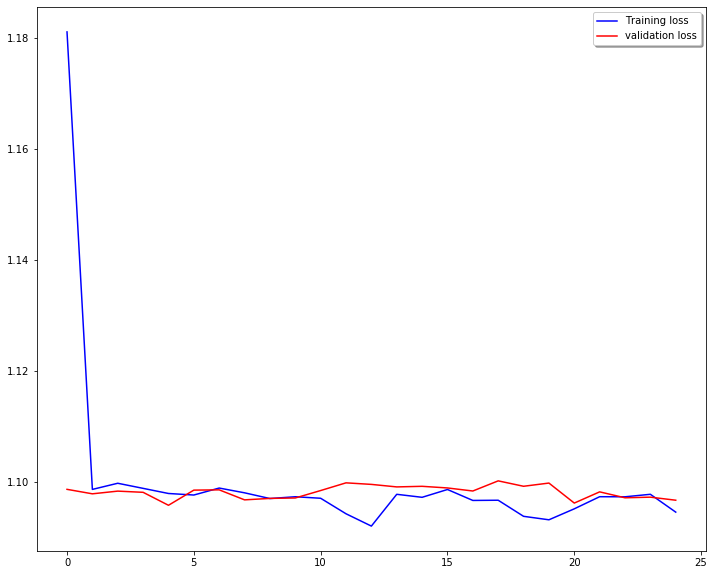

In [24]:
#Graph for training and validation loss

fig = plt.subplots(figsize=(12,10))
plt.plot(history.history['loss'], color='b', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="validation loss")
plt.legend(loc='best', shadow=True)

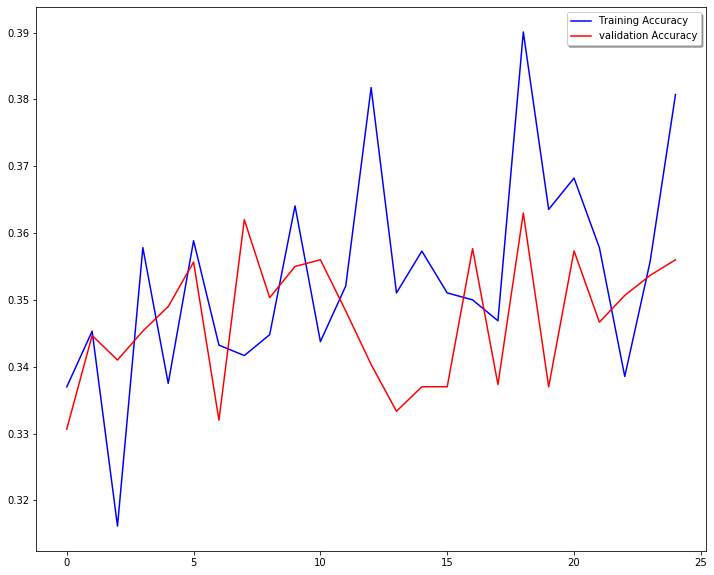

In [25]:
#Graph for training and validation accuracy

fig = plt.subplots(figsize=(12,10))
plt.plot(history.history['accuracy'], color='b', label="Training Accuracy")
plt.plot(history.history['val_accuracy'], color='r', label="validation Accuracy")
plt.legend(loc='best', shadow=True)

In [26]:
val_imgs = validation['Image url']
val_imgs.head()

24000    train_images/769008177543340032-1.jpg
24001    train_images/768843995694923776-1.jpg
24002    train_images/781909999245144064-3.jpg
24003    train_images/801699706971688960-1.jpg
24004    train_images/795600589191192576-1.jpg
Name: Image url, dtype: object

In [27]:
classes = train_generator.class_indices
print(classes)

{'Negative': 0, 'Neutral': 1, 'Positive': 2}


In [28]:
inverted_classes = dict(map(reversed, classes.items()))
print(inverted_classes)

{0: 'Negative', 1: 'Neutral', 2: 'Positive'}


#### Model Prediction

In [29]:
#Prediction on Validation data

from keras.preprocessing import image
Y_pred = []
for i in val_imgs:
    img = image.load_img(path= i,target_size=(128,128,3))
    img = image.img_to_array(img)
    val_img = img.reshape((1,128,128,3))
    img_class = classifier.predict_classes(val_img)
    prediction = img_class[0]
    Y_pred.append(prediction)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [30]:
prediction_classes = [ inverted_classes.get(item,item) for item in Y_pred ]

In [31]:
print(prediction_classes)

['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral

In [32]:
val_label = validation['Sentiment']
val_label

24000    Positive
24001    Positive
24002     Neutral
24003    Negative
24004    Negative
           ...   
26995    Positive
26996    Positive
26997    Positive
26998    Negative
26999     Neutral
Name: Sentiment, Length: 3000, dtype: object

In [33]:
#Accuracy on Validation data

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(val_label, prediction_classes)
print(accuracy)

0.357


In [34]:
test_imgs = test['Image url']
test_imgs.head()

27000    train_images/769450118764429312-1.jpg
27001    train_images/769197625853743104-1.jpg
27002    train_images/795984577705680896-1.jpg
27003    train_images/803221664716746752-4.jpg
27004    train_images/784327642187042816-1.jpg
Name: Image url, dtype: object

In [35]:
#Prediction on testing data

from keras.preprocessing import image
X_pred = []
for i in test_imgs:
    img = image.load_img(path= i,target_size=(128,128,3))
    img = image.img_to_array(img)
    val_img = img.reshape((1,128,128,3))
    img_class = classifier.predict_classes(val_img)
    prediction = img_class[0]
    X_pred.append(prediction)

In [37]:
predict_classes = [ inverted_classes.get(item,item) for item in X_pred ]

In [38]:
print(predict_classes)

['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Negative', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 

In [39]:
test_label = test['Sentiment']
test_label

27000     Neutral
27001    Positive
27002    Negative
27003    Negative
27004    Positive
           ...   
29995    Negative
29996    Negative
29997    Negative
29998    Positive
29999     Neutral
Name: Sentiment, Length: 3000, dtype: object

In [40]:
#Accuracy on testing data

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_label, predict_classes)
print(accuracy)

0.3506666666666667


In [41]:
#Classification report for testing data

from sklearn.metrics import classification_report
target_names = ['0', '1', '2']
print(classification_report(test_label, predict_classes, target_names=target_names))

              precision    recall  f1-score   support

           0       0.38      0.15      0.22       983
           1       0.35      0.85      0.49      1011
           2       0.34      0.05      0.08      1006

    accuracy                           0.35      3000
   macro avg       0.36      0.35      0.26      3000
weighted avg       0.35      0.35      0.26      3000

